<a href="https://colab.research.google.com/github/tanriders/Berkeley-Earth_PM2.5-Forecasting-In-Bangkok/blob/main/Berkeley_Earth_PM2_5_Forecasting_In_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**PM2.5 Forecasting In Bangkok_(Historical data)**

ข้อมูลรายชั่วโมง Particulate Air Pollution (PM2.5)
Bangkok, Thailand:
https://berkeleyearth.org/air-quality/local/Thailand/Bangkok/Bangkok/

ดึงข้อมูลจาก: https://data.berkeleyearth.org/air-quality/local/Thailand/Bangkok/Bangkok.txt

ช่วงต้นปี 2562 ประเทศไทยเกิดปรากฏการณ์ฝุ่นปกคลุมอย่างหนาแน่น เป็นเหตุให้ทุกภาค ส่วนตั้งแต่หน่วยงานรัฐ สื่อมวลชน และประชาชนเองต้องออกมาหาคำตอบว่ามันคืออะไร นี่คือครั้งแรกที่เรื่องฝุ่น PM2.5 ปรากฏอยู่บนสื่อแทบทุกแขนง

**ฝุ่น PM2.5** หรือชื่อเต็มคือ Particulate matter with diameter of less than 2.5 micron เป็นฝุ่นละอองขนาดจิ๋วที่มีขนาดไม่เกิน 2.5 ไมครอน เป็น 1 ในดัชนีคุณภาพอากาศ (Air Quality Index) หรือ AQI

**ค่า AQI** เป็นการรายงานข้อมูลคุณภาพอากาศในภาพรวมที่ประกอบด้วยมลพิษทางอากาศ 6 ชนิด ได้แก่
* ฝุ่นละอองขนาดไม่เกิน 10 ไมครอน (PM10)
* ก๊าซโอโซน (O3)
* ก๊าซคาร์บอนมอนอกไซด์ (CO)
* ก๊าซไนโตรเจนไดออกไซด์ (NO2)
* ก๊าซซัลเฟอร์ไดออกไซด์ (SO2)
* ฝุ่นละอองขนาดไม่เกิน 2.5 ไมครอน (PM2.5)

การวัด PM2.5 เป็นตัวกำหนดสำหรับการอ่าน AQI เนื่องจาก PM2.5 มีอยู่ทั่วไปและถือว่าเป็นมลพิษทางอากาศที่อันตรายที่สุดที่ส่งผลกระทบต่อสุขภาพของมนุษย์ PM2.5 วัดโดยไมโครกรัมต่อลูกบาศก์เมตร (μg/m 3 ) ดังรูป    

**ความร้ายแรงของ PM2.5** คือ มันสามารถผ่านการ กรองของขนจมูกและเข้าสู่ชั้นในสุดของปอดได้ แม้ฝุ่นจิ๋ว PM2.5 จะไม่ได้เป็นอันตรายต่อร่างกายแบบเฉียบพลัน แต่ต้องใช้เวลาสะสมนับสิบปีถึงจะแสดงผลอันตรายจากฝุ่น PM2.5 คือ มันสามารถทำหน้าที่เป็นตัวกลางพาสารอื่นๆ เข้า สู่ปอด ด้วยการให้สารเหล่านั้นมาเคลือบบนผิว ของมัน เช่น สารก่อมะเร็ง สารโลหะหนัก เป็นต้น  



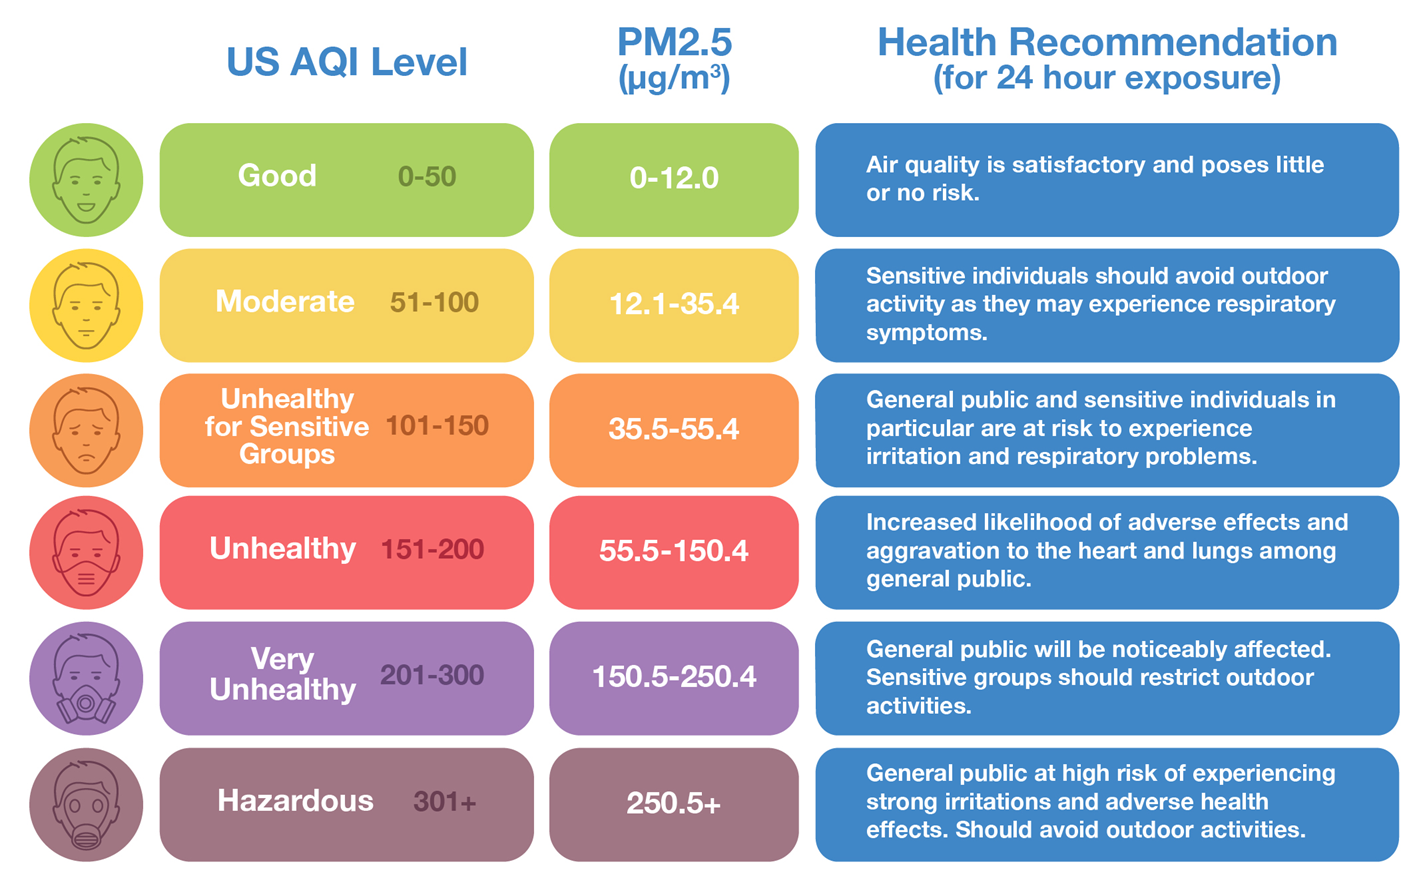

**สาเหตุการเกิด PM 2.5**

ส่วนใหญ่เกิดจาก **การเผาไหม้** ทั้งจากเครื่องยนต์ของยานพาหนะต่างๆ และการเผาวัสดุต่างๆ

ข้อมูลจากกรมมลพิษ และกระทรวงพลังงาน พบว่า

สาเหตุของ PM2.5 ในประเทศไทยมาจาก **‘การเผาในที่โล่ง’** เป็นแหล่งกำเนิดของ PM2.5 มากที่สุด ตามด้วยอุตสาหกรรมการผลิต และการขนส่ง โดยภาคการผลิตไฟฟ้านั้นเป็นแหล่งกำเนิด PM2.5 ในอันดับที่ 4   

#**Import Library**

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from datetime import datetime
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense



#**Web scraping PM2.5 Data (Berkeley Earth)**

In [ ]:
url = 'https://data.berkeleyearth.org/air-quality/local/Thailand/Bangkok/Bangkok.txt'

# ดึงข้อมูล
data = pd.read_csv(url, skiprows=10, delimiter='\t')
data.columns =['Year', 'Month', 'Day', 'Hour', 'PM2.5', 'PM10_mask', 'Retrospective']

# บันทึกเป็นไฟล์ CSV
data.to_csv('Bangkok_air_quality.csv', index=False)



print("ข้อมูลได้ถูกบันทึกเป็นไฟล์ Bangkok_air_quality.csv แล้ว")

ข้อมูลได้ถูกบันทึกเป็นไฟล์ Bangkok_air_quality.csv แล้ว


In [ ]:
# อ่านไฟล์ CSV
df = pd.read_csv('Bangkok_air_quality.csv')

# แสดงตัวอย่างข้อมูลหัวตาราง
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,9,62.9,1.0,0
1,2016,3,3,10,55.5,1.0,0
2,2016,3,3,11,55.5,1.0,0
3,2016,3,3,12,47.9,1.0,0
4,2016,3,3,13,43.6,1.0,0


#**Exploratory Data Analysis**

In [ ]:
df.shape

(48355, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48355 entries, 0 to 48354
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           48355 non-null  int64  
 1   Month          48355 non-null  int64  
 2   Day            48355 non-null  int64  
 3   Hour           48355 non-null  int64  
 4   PM2.5          48355 non-null  float64
 5   PM10_mask      48355 non-null  float64
 6   Retrospective  48355 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.6 MB


In [ ]:
df.describe()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
count,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.0
mean,2018.953676,6.498439,15.756923,11.517713,24.837543,0.263241,0.0
std,2.207137,3.204539,8.829235,6.928901,13.763372,0.440396,0.0
min,2016.000000,1.000000,1.000000,0.000000,2.500000,0.000000,0.0
25%,2017.000000,4.000000,8.000000,6.000000,15.000000,0.000000,0.0
50%,2019.000000,6.000000,16.000000,12.000000,20.900000,0.000000,0.0
75%,2020.000000,9.000000,23.000000,18.000000,31.000000,1.000000,0.0
max,2023.000000,12.000000,31.000000,23.000000,115.400000,1.000000,0.0


In [ ]:
#Check missing data
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Year,0,0.0
Month,0,0.0
Day,0,0.0
Hour,0,0.0
PM2.5,0,0.0
PM10_mask,0,0.0
Retrospective,0,0.0


รวมคอลัมน์ Year, Month, Day, และ Hour เป็น datetime

parse(x): เป็นฟังก์ชันที่ใช้สำหรับแปลง string ในรูปแบบ '%Y %m %d %H' เป็น object ประเภท datetime

In [ ]:
# ใช้ฟังก์ชัน parse สำหรับแปลงคอลัมน์เป็น datetime index
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# รวมคอลัมน์ Year, Month, Day, และ Hour เป็น datetime index
df['date'] = df[['Year', 'Month', 'Day', 'Hour']].apply(lambda row: datetime(*row), axis=1)
df.set_index('date', inplace=True)
df.drop(['Year', 'Month', 'Day', 'Hour'], axis=1, inplace=True)

# แสดงผล DataFrame หลังจากแปลงเป็น datetime index
df.head()

,PM2.5,PM10_mask,Retrospective
date,,,
2016-03-03 09:00:00,62.9,1.0,0
2016-03-03 10:00:00,55.5,1.0,0
2016-03-03 11:00:00,55.5,1.0,0
2016-03-03 12:00:00,47.9,1.0,0
2016-03-03 13:00:00,43.6,1.0,0


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
PM2.5,48355.0,24.84,13.76,2.5,15.0,20.9,31.0,115.4
PM10_mask,48355.0,0.26,0.44,0.0,0.0,0.0,1.0,1.0
Retrospective,48355.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['PM10_mask', 'Retrospective'], axis=1, inplace=True)

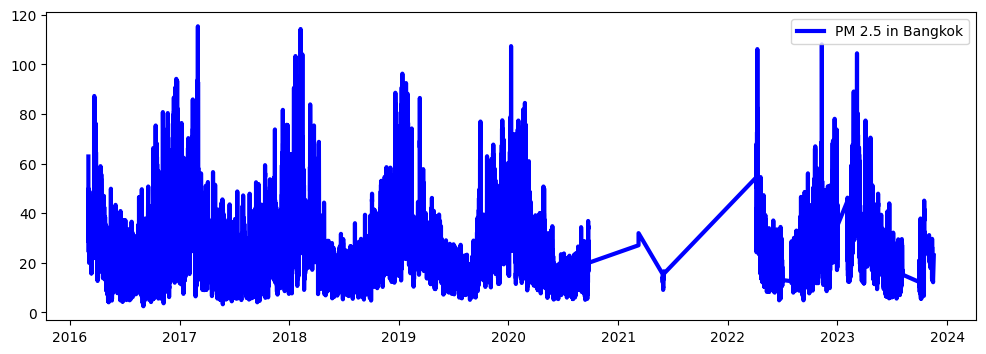

In [ ]:
#มลพิษ ประเทศไทย ค่า PM 2.5 ไม่ควรเกิน 50 ไมโครกรัมต่อลูกบาศก์เมตรใน 24 ชั่วโมง

plt.figure(figsize=(12, 4))
plt.plot(df, 'b', lw=3.0, label='PM 2.5 in Bangkok')
plt.legend()
plt.show()

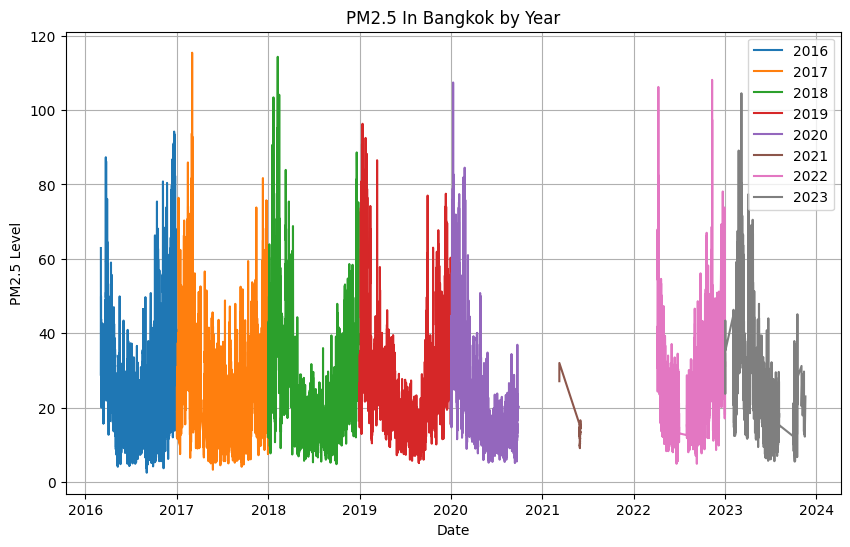

In [ ]:

# สร้างกราฟ PM2.5 ในแต่ละปี
plt.figure(figsize=(10, 6))

# วนลูปเพื่อพล็อตกราฟของแต่ละปี
for year in df.index.year.unique():
    df_year = df[df.index.year == year]
    plt.plot(df_year.index, df_year['PM2.5'], label=str(year))

# ตกแต่งกราฟ
plt.title('PM2.5 In Bangkok by Year')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()
plt.grid(True)
plt.show()

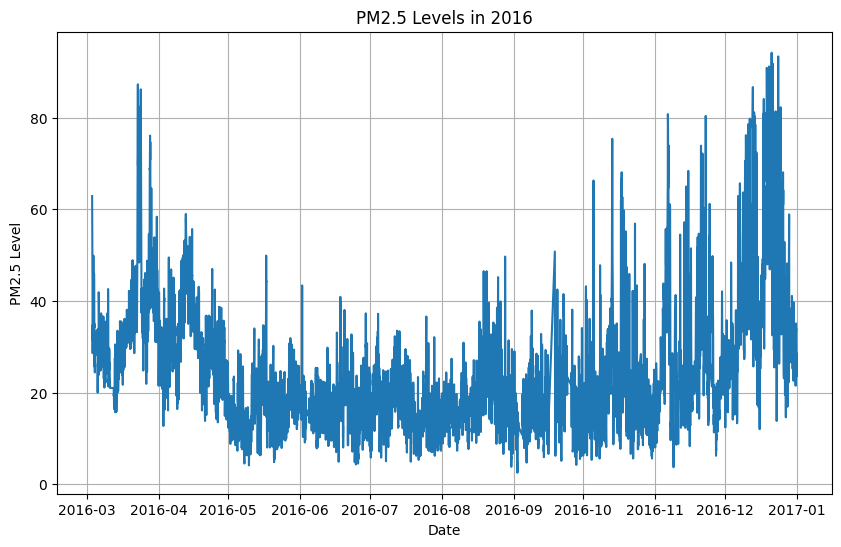

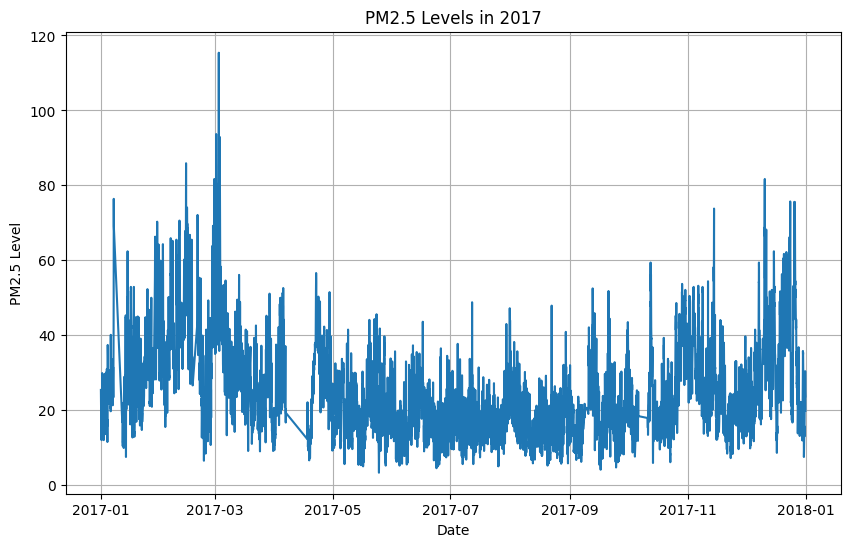

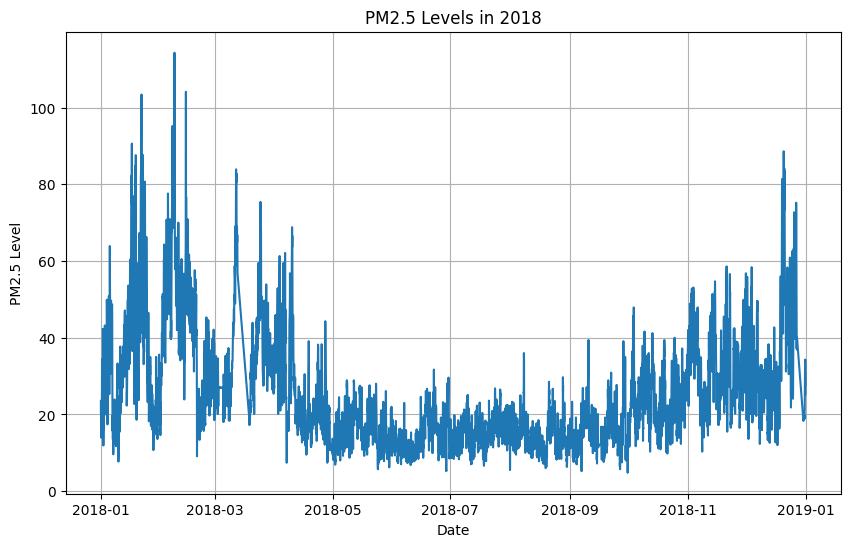

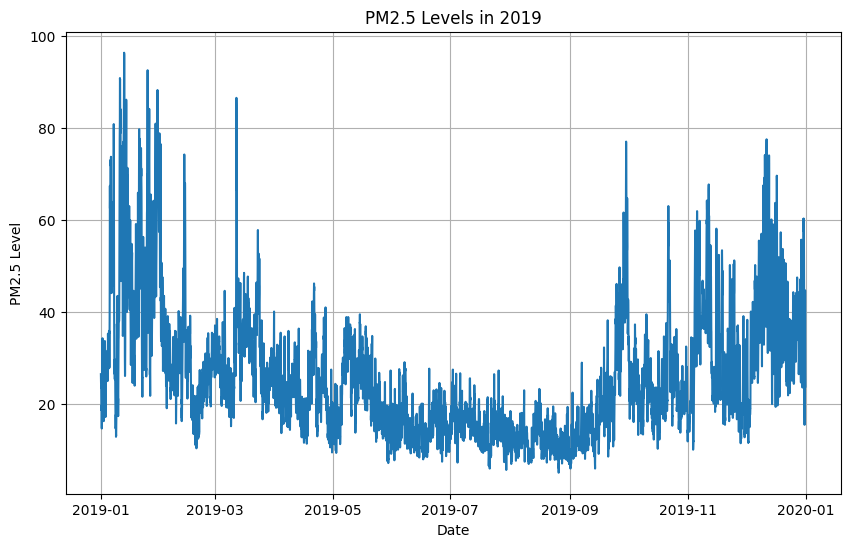

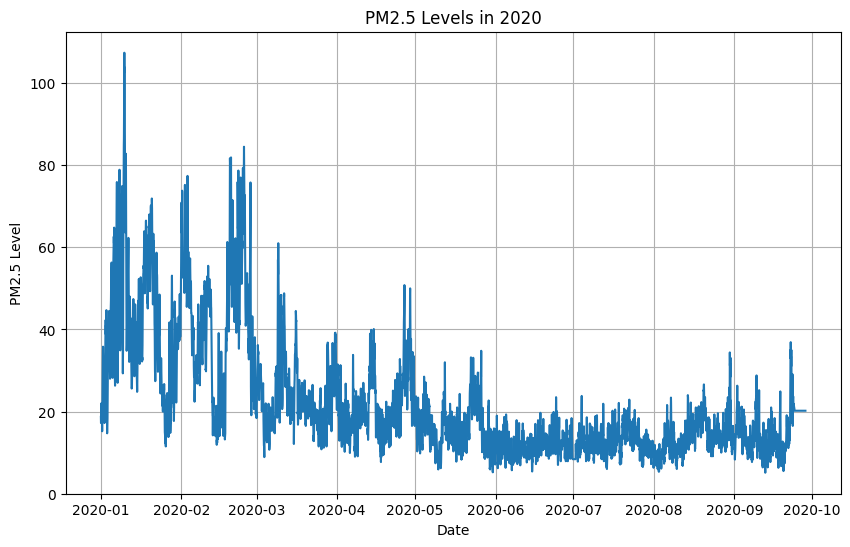

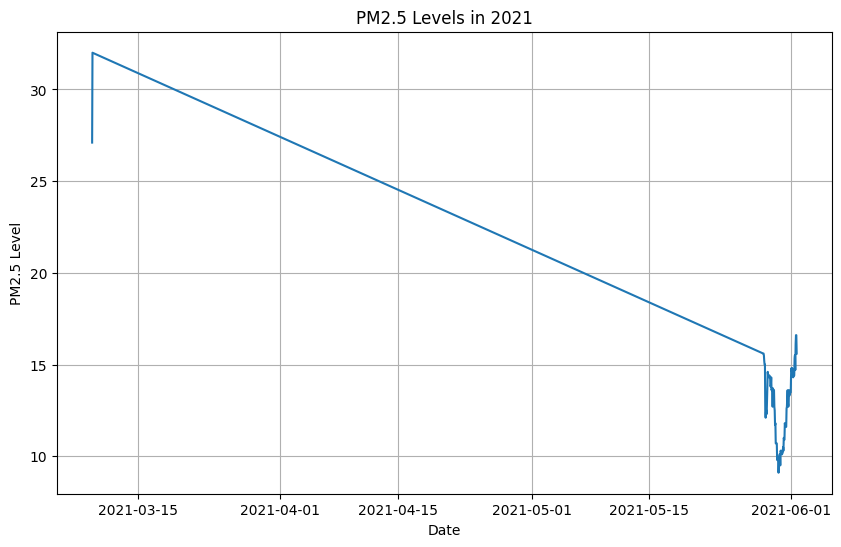

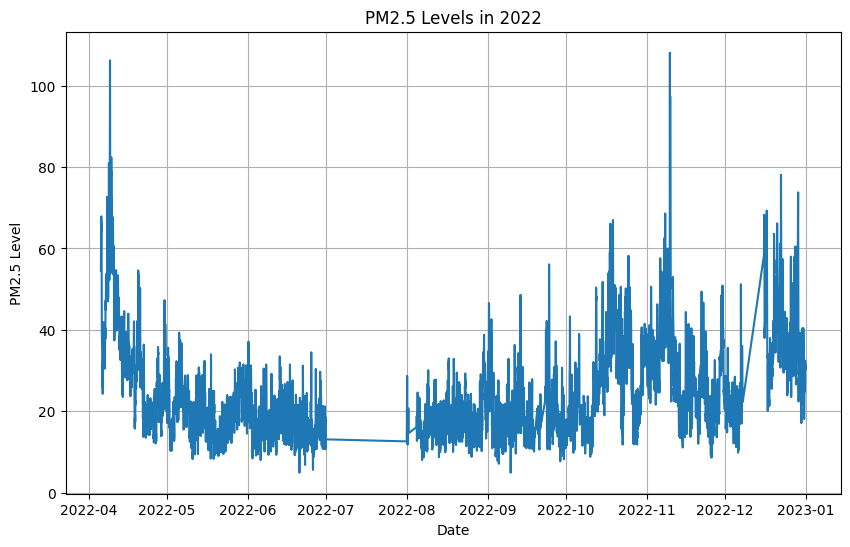

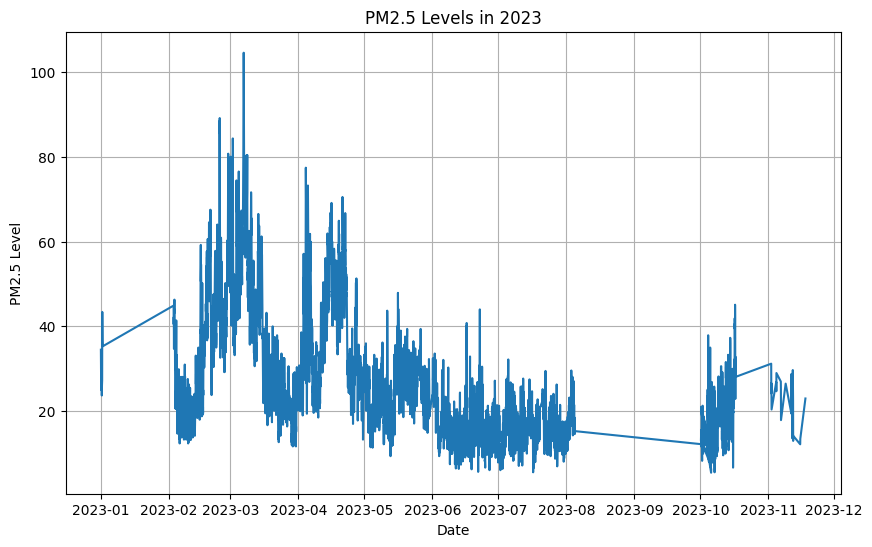

In [ ]:
# สร้างฟังก์ชันสำหรับพล็อตกราฟ PM2.5 ในแต่ละปี
def plot_pm25_by_year(df, year):
    df_year = df[df.index.year == year]
    plt.figure(figsize=(10, 6))
    plt.plot(df_year.index, df_year['PM2.5'], linestyle='-')
    plt.title(f'PM2.5 Levels in {year}')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Level')
    plt.grid(True)
    plt.show()

# พล็อตกราฟ PM2.5 ในแต่ละปีตามที่ต้องการ
years_to_plot = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for year in years_to_plot:
    plot_pm25_by_year(df, year)

#**Training model**

การแบ่งข้อมูลใช้ในการ train และ test

In [ ]:
n_train = int(df.shape[0] * 0.80)
n_train

38684

การแปลงข้อมูลให้เป็น Normalize คือแปลงข้อมูลให้เป็นเลข 0-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:5]

array([[0.53498671],
       [0.46944198],
       [0.46944198],
       [0.40212578],
       [0.36403897]])

สร้างฟังก์ชันเพื่อเตรียมข้อมูลให้เป็น matrix ใช้ step = 2

ฟังก์ชันนี้สร้างข้อมูลในรูปแบบของเมทริกซ์ X ซึ่งเป็นข้อมูลเข้า (input) และ Y เป็นข้อมูลเป้าหมาย (target) ซึ่งสามารถนำไปใช้ในการฝึก (train) โมเดลการเรียนรู้ของคอมพิวเตอร์ได้ เช่น ใช้ในการฝึกโมเดล LSTM (Long Short-Term Memory) ที่ใช้ในงานทางด้านแหล่งข้อมูลลำดับเวลา (time series data)

In [ ]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

การแบ่งข้อมูลเพื่อใช้ในการ train และ test

In [ ]:
train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape

((38684, 1), (9671, 1))

In [ ]:
step = 2

X_train, y_train = convertToMatrix(train, step)
X_test, y_test = convertToMatrix(test, step)

print('Train Test (after conversion):', X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Train Test (after conversion): (38682, 2, 1) (9669, 2, 1)
(38682, 1) (9669, 1)


#**Model**

**LSTM ย่อมาจาก Long Short-Term Memory**

 เป็นประเภทหนึ่งของสถาปัตยกรรมแบบ Recurrent Neural Network (RNN) อยู่ในกลุ่มของ Deep Learning ถูกออกแบบให้จดจำ Patterns ในช่วงเวลานานๆ มีประสิทธิภาพสำหรับปัญหาการทำนายที่เป็น Sequential เนื่องจากสามารถเก็บข้อมูลก่อนหน้าและนำมาร่วมใช้ในการประมวลผลได้

Long Short Term Memory ( LSTM )
เป็น RNN cell แบบนึงที่นิยมใช้ในปัจจุบัน

การทำงานภายในจะเพิ่ม cell state ขึ้นมาเพื่อให้จำข้อมูลตัวก่อนๆได้ดีขึ้น โดยจะทำหน้าเหมือนกับ memory ในการบันทึกข้อมูลที่ผ่านมาในแต่ละลำดับ

RNN จะเห็นมีใช้แค่ hidden state ของตัวก่อนหน้าแค่นั้น ซึ่งข้อมูลใน hidden state แทบจะไม่บ่งบอกข้อมูลของตัวที่อยู่ลำดับก่อนๆตัวมันไปอีก ซึ่งในความเป็นจริงข้อมูลอาจจะมีความสัมพันธ์กับข้อมูลที่อยู่ก่อนหน้ามันสัก 2-3 ลำดับหรือมากกว่า


**โมเดล LSTM ประกอบด้วย gate หลักๆที่เป็นบทบาทสำคัญในการควบคุมอยู่ 3 gate ดังนี้**

* i -> (Input gate) ทำหน้าที่ควบคุมว่าข้อมูลใหม่ ๆ จะถูกเก็บไว้ในหน่วยความจำหรือไม่

* f -> (Forget gate) ทำหน้าที่ควบคุมว่าข้อมูลเก่า ๆ จะถูกลบออกจากหน่วยความจำหรือไม่

* o -> (Output gate) ทำหน้าที่ควบคุมว่าข้อมูลในหน่วยความจำจะถูกส่งออกหรือไม่

**การทำงานของโมเดล LSTM**

1. **Input gate** จะพิจารณาว่าข้อมูลใหม่ ๆ มีความสำคัญหรือไม่ หากมีความสำคัญ **Input gate** ก็จะเปิดออกและข้อมูลใหม่ ๆ จะถูกเก็บไว้ในหน่วยความจำ

2. จากนั้น **Forget gate** จะพิจารณาว่าข้อมูลเก่า ๆ มีความสำคัญหรือไม่ หากไม่สำคัญ **Forget gate** ก็จะเปิดออกและข้อมูลเก่า ๆ จะถูกลบออกจากหน่วยความจำ

3. สุดท้าย **Output gate** จะพิจารณาว่าข้อมูลในหน่วยความจำมีความสำคัญหรือไม่ หากมีความสำคัญ **Output gate** ก็จะเปิดออกและข้อมูลในหน่วยความจำจะถูกส่งออก

[LSTM (Long Short Term Memory)คืออะไร](https://www.youtube.com/watch?v=Cc-8MgvRxo8)

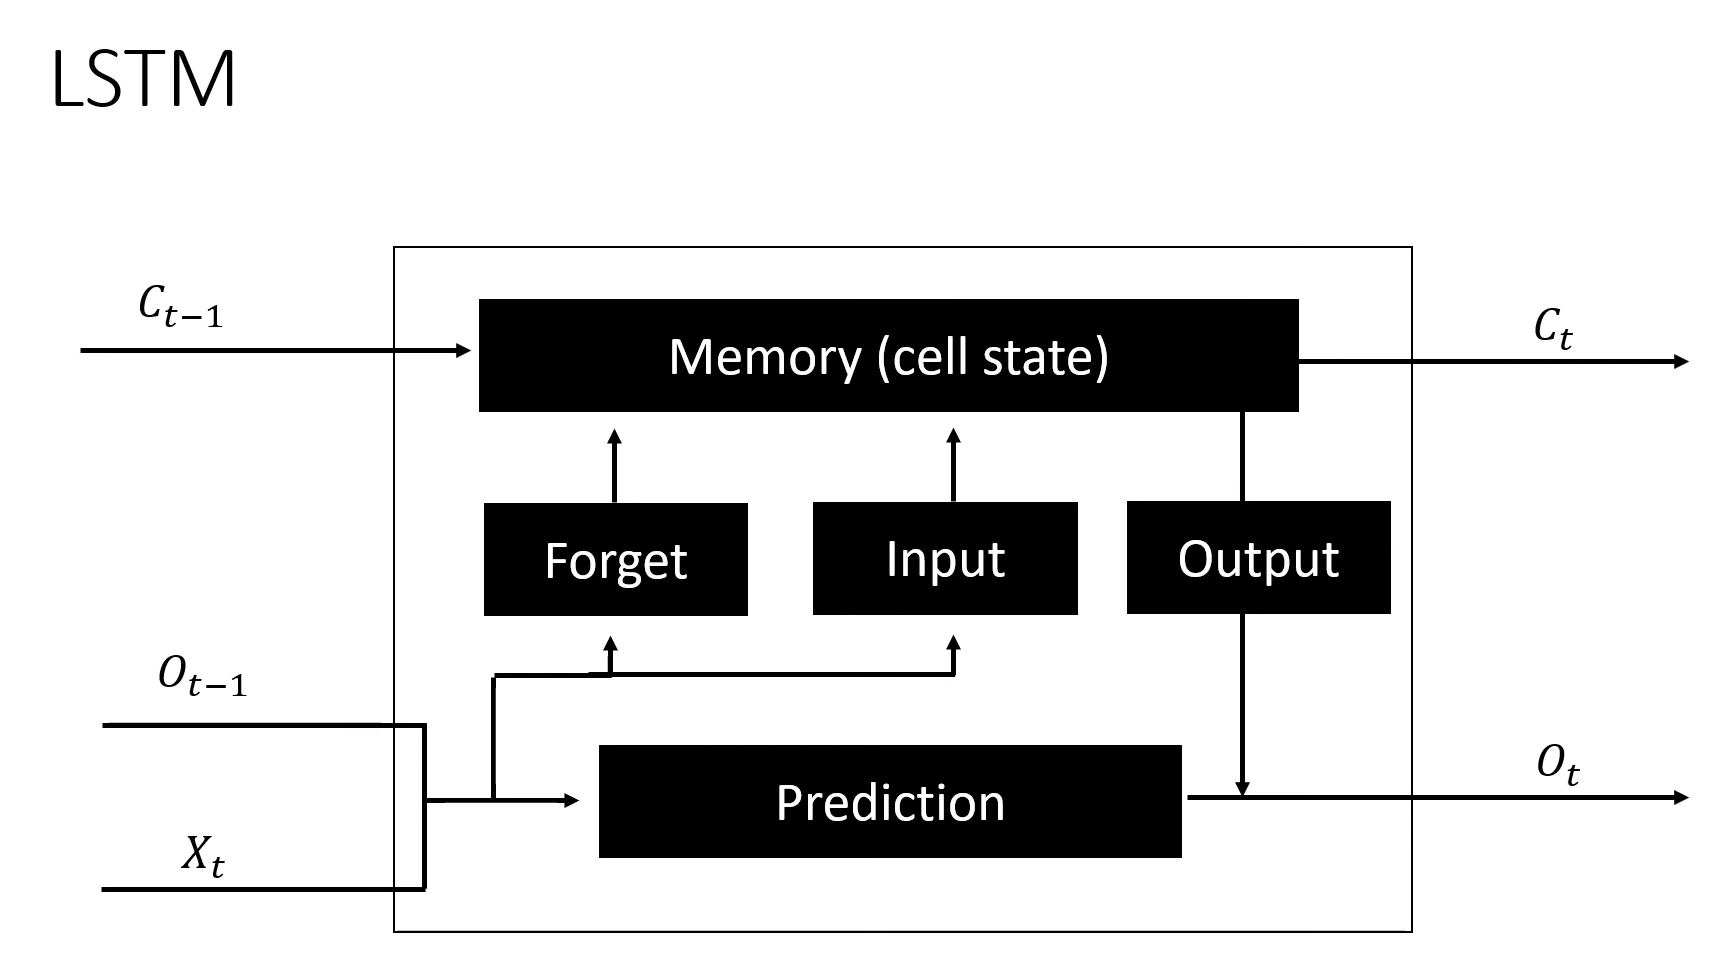

โมเดล LSTM สามารถใช้แก้ปัญหาต่าง ๆ ที่เกี่ยวข้องกับข้อมูลที่เป็นลำดับ (sequential data) เช่น

* การทำนายข้อความ (text prediction)
* การแปลภาษา (machine translation)
* การจดจำเสียง (speech recognition)
* การจำแนกประเภทข้อความ (text classification)
* การทำนายราคาหุ้น (stock price prediction)
* การทำนายสภาพอากาศ (weather prediction)


**ตัวอย่างการใช้งานโมเดล LSTM ในชีวิตประจำวัน เช่น**

* ใช้ในการแนะนำเพลง (music recommendation)
* ใช้ในการแนะนำผลิตภัณฑ์ (product recommendation)
* ใช้ในการกรองอีเมลขยะ (spam filtering)
* ใช้ในการตรวจสอบความถูกต้องของข้อมูล (data validation)


โมเดล LSTM เป็นหนึ่งในโมเดลการเรียนรู้ของเครื่องที่มีประสิทธิภาพสูงสำหรับปัญหาที่เกี่ยวข้องกับข้อมูลที่เป็นลำดับ

ในปัจจุบันโมเดล LSTM ถูกนำมาใช้อย่างแพร่หลายในหลากหลายสาขา

การสร้างโมเดล LSTM

In [ ]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(step, 1), activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


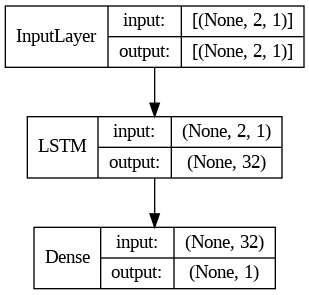

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'my_lstm.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1209/1209 [==============================] - 3s 2ms/step - loss: 0.0046
Epoch 2/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0014
Epoch 3/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 4/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 5/10
1209/1209 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 6/10
1209/1209 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 7/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 8/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 9/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013
Epoch 10/10
1209/1209 [==============================] - 2s 2ms/step - loss: 0.0013


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

303/303 [==============================] - 1s 1ms/step - loss: 0.0015
0.0014695904683321714


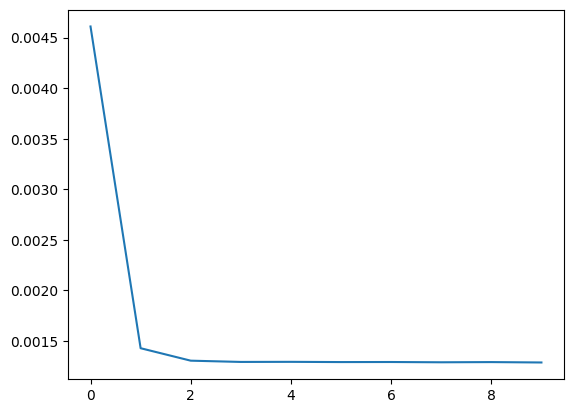

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend
plt.show()

In [ ]:
trainPredict = model.predict(X_train)
trainPredict

1209/1209 [==============================] - 2s 1ms/step


array([[0.4406948 ],
       [0.4543583 ],
       [0.376054  ],
       ...,
       [0.26581222],
       [0.33709857],
       [0.20781201]], dtype=float32)

In [ ]:
testPredict = model.predict(X_test)
testPredict


303/303 [==============================] - 0s 1ms/step


array([[0.26203543],
       [0.22055277],
       [0.22598177],
       ...,
       [0.10280888],
       [0.08477193],
       [0.09735187]], dtype=float32)

In [ ]:
test = np.argmax(testPredict, axis=1)

test2 = np.argmax(y_test, axis=1)

#**Evaluation Model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

trainPredict_inv = sc.inverse_transform(trainPredict)
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv, trainPredict_inv)
r2_test = r2_score(y_test_inv, testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv, trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2_Train: {:.3f}'.format(r2_train))
print('R2_Test: {:.3f}'.format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2_Train: 0.915
R2_Test: 0.885
RMSE Train: 4.087
RMSE Test: 4.328


* R-Square: เป็นค่าที่บอกว่าผลลัพธ์ที่ได้จาก Model เทียบกับค่าจริงแล้ว มีแนวโน้มไปใน ทิศทางเดียวกันมากน้อยเพียงใด โดยค่า R-Square มีค่าระหว่าง -1 ถึง 1 โดยยิ่งมีค่าเข้าใกล้ 1 นั่นหมายความว่าผลที่ได้จากการทำนาย และค่าจริงมีทิศทางไปในทางเดียวกัน

* Root Mean Square Error: เป็นการวัด Error โดยการเทียบค่าที่ได้จากการทำนาย กับค่าที่เกิดขึ้นจริง โดยค่า Error

In [ ]:
prefix = np.empty(step).reshape(-1, 1)

trainPredict_inv = np.concatenate((prefix, trainPredict_inv), axis=0)
testPredict_inv = np.concatenate((prefix, testPredict_inv), axis=0)

predict_inv = np.concatenate((trainPredict_inv, testPredict_inv), axis=0)

In [ ]:
predict_inv

array([[4.77712073e-320],
       [4.77712073e-320],
       [5.22544441e+001],
       ...,
       [1.41071224e+001],
       [1.20707512e+001],
       [1.34910259e+001]])

In [ ]:
pred_inv = sc.inverse_transform(predict_inv)
pred_inv

array([[2.50000000e+00],
       [2.50000000e+00],
       [5.90202674e+03],
       ...,
       [1.59519412e+03],
       [1.36528781e+03],
       [1.52563683e+03]])

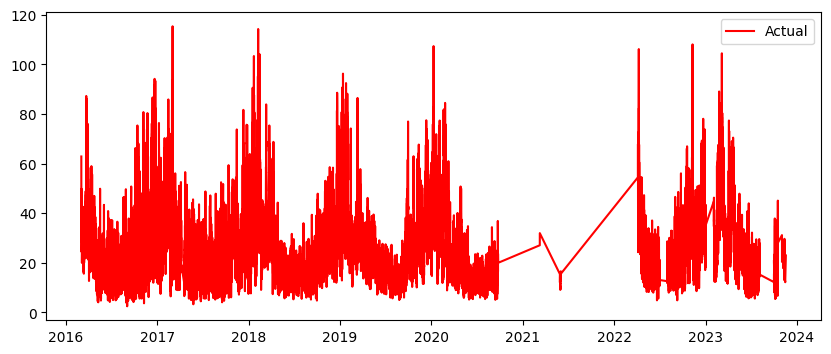

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df, 'r', label='Actual')
plt.legend()
plt.show()

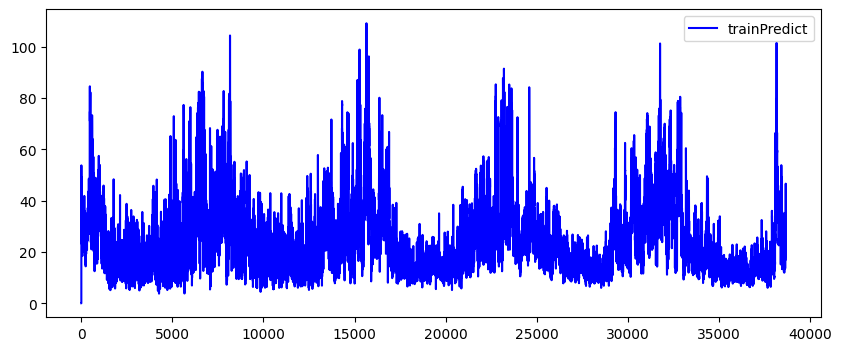

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(trainPredict_inv, 'b', label='trainPredict')
plt.legend()
plt.show()

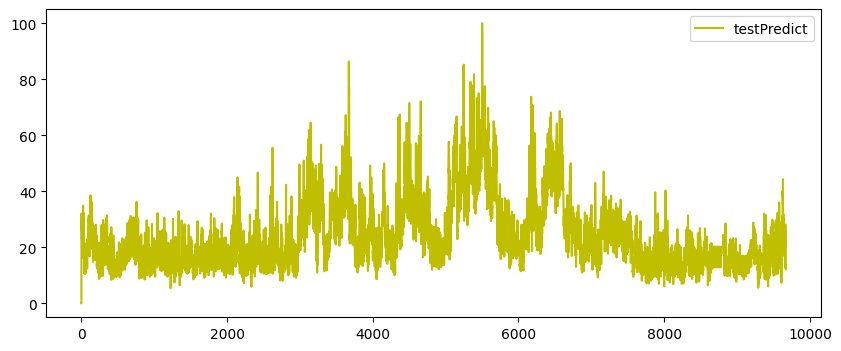

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(testPredict_inv, 'y', label='testPredict')
plt.legend()
plt.show()

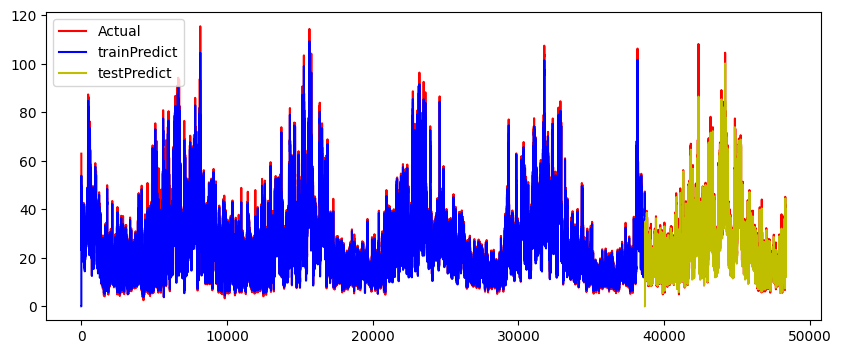

In [ ]:
plt.figure(figsize=(10, 4))
# สร้างลำดับของค่าในแกน x ตามความยาวของ trainPredict และ testPredict
x_train = range(len(trainPredict_inv))
x_test = range(len(trainPredict_inv), len(trainPredict_inv) + len(testPredict_inv))


plt.plot(df.values, 'r', label='Actual')
# พล็อตกราฟ trainPredict และ testPredict ในแกน x ต่อกัน
plt.plot(x_train, trainPredict_inv, 'b', label='trainPredict')
plt.plot(x_test, testPredict_inv, 'y', label='testPredict')

plt.legend()
plt.show()

In [ ]:
# เปลี่ยนรูปแบบของ array เป็น 1 มิติ
predict_inv_reshaped = predict_inv.reshape(-1)

# สร้าง DataFrame จาก array
df_predict_inv = pd.DataFrame({'predict_inv': predict_inv_reshaped.round(0),})

df_predict_inv

,predict_inv
0,0.0
1,0.0
2,52.0
3,54.0
4,45.0
...,...
48350,22.0
48351,12.0
48352,14.0
48353,12.0


In [ ]:
df_predict_inv = pd.DataFrame({'Predict': predict_inv_reshaped.round(0)}, index=df.index)
# เพิ่ม df_predict_inv เข้าไปใน df โดยใช้ join()
df = df.join(df_predict_inv)

In [ ]:
df.tail(24)

,PM2.5,Predict
date,,
2023-11-08 21:00:00,26.5,25.0
2023-11-11 11:00:00,19.5,26.0
2023-11-11 12:00:00,22.3,18.0
2023-11-11 13:00:00,28.8,22.0
2023-11-11 14:00:00,19.4,28.0
2023-11-11 16:00:00,21.9,18.0
2023-11-11 17:00:00,19.9,21.0
2023-11-11 18:00:00,20.1,19.0
2023-11-11 19:00:00,20.5,19.0


In [ ]:
# ทำนายข้อมูลในอนาคต 8784 ชั่วโมงหรือ 366 วันข้างหน้า
n_ahead = 8784 # ชั่วโมง
yhat = model.predict(X_train[:n_ahead]) # ทำนายข้อมูลในอนาคต
yhat

275/275 [==============================] - 0s 1ms/step


array([[0.4406948 ],
       [0.4543583 ],
       [0.376054  ],
       ...,
       [0.18073493],
       [0.18017146],
       [0.21744284]], dtype=float32)

In [ ]:
yhat.shape

(8784, 1)

In [ ]:
yhat_reshaped = sc.inverse_transform(yhat)


# สร้าง index ให้กับช่วงเวลาที่ต้องการทำนาย
date_rng = pd.date_range(start='2023-11-17', end='2024-11-17', freq='H')

# แปลง numpy array เป็น DataFrame
yhat_df = pd.DataFrame(yhat_reshaped, columns=['Prediction'], index=date_rng[:len(yhat)])

yhat_df

,Prediction
2023-11-17 00:00:00,52.254444
2023-11-17 01:00:00,53.797054
2023-11-17 02:00:00,44.956493
2023-11-17 03:00:00,41.616261
2023-11-17 04:00:00,26.197655
...,...
2024-11-16 19:00:00,25.132355
2024-11-16 20:00:00,25.256084
2024-11-16 21:00:00,22.904974
2024-11-16 22:00:00,22.841356


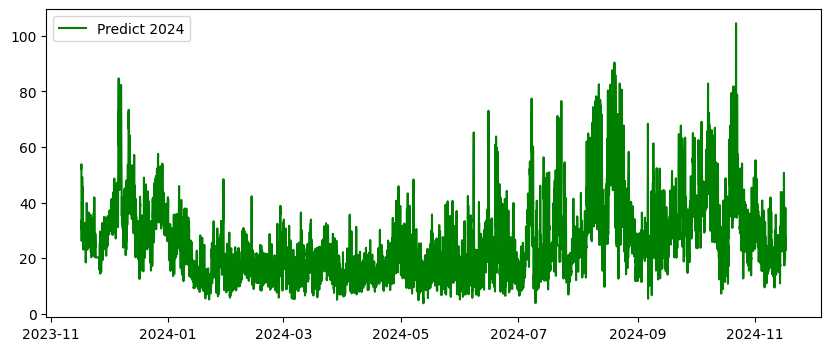

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(yhat_df, 'g', label='Predict 2024')
plt.legend()
plt.show()

#**Conclusion**

ด้วยข้อมูลคุณภาพอากาศที่ได้จาก Berkeley Earth และ ผลลัพท์จากการทำนายค่า PM2.5 เราพอจะสรุปได้คร่าวๆว่า โมเดลได้ทำนายค่าของ PM 2.5 ในปีหน้า โดยทำนายว่าค่าฝุ่น PM2.5 จะมีค่าที่สูงในช่วงกลางปี


โมเดลใช้ข้อมูลรายชั่วโมงมาทำนายเป็นรายปี ซึ่งทำให้ความแม่นยำน้อย

การนำข้อมูลต่าง ๆ มาหาความสัมพันธ์ เพื่อประเมินสาเหตุและความเกี่ยวข้องต่าง ๆ ที่ก่อให้เกิดมลพิษ
ทางอากาศ ซึ่งมลพิษทางอากาศที่เห็นได้ชัดเจนคือปริมาณของฝุ่นละอองทั้งนี้ความเข้าใจพื้นฐานเชื่อว่าฝุ่นจะมากับฤดูหนาว ซึ่งความจริงแล้ว อุณหภูมิของอากาศอาจจะเป็นเพียงปัจจัยหนึ่ง และยังมีอีกหลายปัจจัยที่เกี่ยวข้อง เพราะถ้ามีแค่เรื่องของอุณหภูมิ แล้วทำไมแต่ละพื้นที่ ที่มีอุณหภูมิเท่ากัน ถึงมีปริมาณฝุ่นที่แตกต่างกัน


ทั้งนี้การวิเคราะห์ปัจจัยต่าง ๆ ทางอุตุนิยมวิทยาที่เกี่ยวข้องกับปริมาณมลพิษทางอากาศ ได้แก่
* อุณหภูมิ
* ความชื้น
* ความเร็วลม
* ทิศทางลม
* การจราจร
* จุดความร้อน (ไฟป่า)

มีผลกับปริมาณการเกิดมลพิษทางอากาศอย่างไร

และอาจรวมไปถึงปัจจัยที่เป็นวันเวลา หรือฤดูกาล เช่น

* ปี
* เดือน
* วันที่
* วันในสัปดาห์
* ฤดูกาล

การวิเคราะห์ปัจจัยเหล่านี้อาจทำให้โมเดลพยากรณ์แม่นยำมากขึ้นอีกด้วย

#**LAB**

ปัจจุบัน มีหลายหน่วยงานที่ได้มีจุดตรวจวัดค่า PM 2.5 จริง ในประเทศไทยและได้มีการเผยแพร่ข้อมูลสาธารณะ เช่น

* กรมควบคุมผลพิษ:

เป็นข้อมูลเฉลี่ย 24 ชั่วโมง Particulate Air Pollution (PM2.5) ย้อนหลังหลายปี และมีการเก็บจากหลายจุดตรวจวัดทั่วประเทศ:
https://air4thai.pcd.go.th/webV2/history/

ให้นักศึกษาใช้ข้อมูลจากกรมควบคุมมลพิษเพื่อสร้างโมเดลทำนายค่า PM 2.5 ในปี 2024